# Requirements

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Laboratory Exercise - Run Mode (8 points)

## The Gym Dataset
The dataset contains detailed information on 973 gym members' workout sessions, including their exercise routines, physical attributes, and fitness metrics. The features include age, gender, weight, height, heart rate data (maxiumum BPM, average BPM, and resting BPM), session duration, calories burned, workout type, body fat percentage, water intake, workout frequency, and experience level. Each feature provides insights into different aspects of a gym member's workout habits, physical health, and overall fitness progression. These attributes, except for the 'burned calories', can be used as input variables for analysis and modeling. The 'burned calories' attribute serves as the target variable, representing the total calories burned during each workout session. This dataset offers a comprehensive set of features, making it ideal for exploring and understanding the factors that influence calorie burn during workouts.

Load the dataset into a `pandas` data frame.

In [2]:
df = pd.read_csv('data/gym_members_exercise_tracking.csv')

In [3]:
df.shape

(973, 15)

In [4]:
df.sample(5)

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
468   52  Female         68.2        1.63      179      148           67   
504   42  Female         46.6        1.77      184      139           63   
44    37    Male        124.2        1.76      168      158           50   
661   44    Male        102.3        1.63      188      129           52   
222   24  Female         58.9        1.76      189      130           73   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
468                      1.17            779.0     Strength            27.5   
504                      0.61            382.0         Yoga            28.1   
44                       1.50           1304.0         HIIT            29.3   
661                      1.34            856.0         Yoga            20.9   
222                      0.63            410.0         HIIT            30.1   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
468                    2.4                              3                 1   
504                    2.6                              2                 1   
44                     2.8                              2                 1   
661                    2.6                              4                 2   
222                    1.7                              3                 1   

       BMI  
468  25.67  
504  14.87  
44   40.10  
661  38.50  
222  19.01

Preprocess the input and the output variables appropriately.

In [5]:
df['Workout_Type'].unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

In [6]:
df['Workout_Type'].isnull().sum()

0

In [7]:
dummies = pd.get_dummies(df['Workout_Type'])

In [8]:
df = pd.concat([df, dummies], axis=1)

In [9]:
df.drop(columns=['Workout_Type', 'Yoga'], inplace=True)
df.sample(3)

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
570   23  Female         67.8        1.61      186      160           66   
571   48    Male        114.9        1.86      175      141           56   
359   32    Male        105.3        1.67      184      143           72   

     Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
570                      1.34           1072.0            34.3   
571                      1.36            949.0            21.1   
359                      0.57            448.0            26.9   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
570                    1.8                              2                 1   
571                    3.6                              3                 1   
359                    2.9                              3                 1   

       BMI  Cardio   HIIT  Strength  
570  26.16   False   True     False  
571  33.21    True  False     False  
359  37.76    True  False     False

In [10]:
encoder = LabelEncoder()
encoded_values = encoder.fit_transform(df['Gender'])
df['Gender'] = encoded_values
df.sample(3)

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
278   31       0         63.1        1.64      184      125           51   
641   46       0         47.9        1.72      171      147           57   
720   47       1         73.9        1.80      173      140           50   

     Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
278                      1.54            962.0            19.0   
641                      1.41            933.0            26.3   
720                      1.36            942.0            28.3   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
278                    2.7                              4                 3   
641                    2.0                              3                 1   
720                    3.7                              3                 1   

       BMI  Cardio   HIIT  Strength  
278  23.46    True  False     False  
641  16.19    True  False     False  
720  22.81   False  False      True

Explore the dataset using visualizations of your choice.

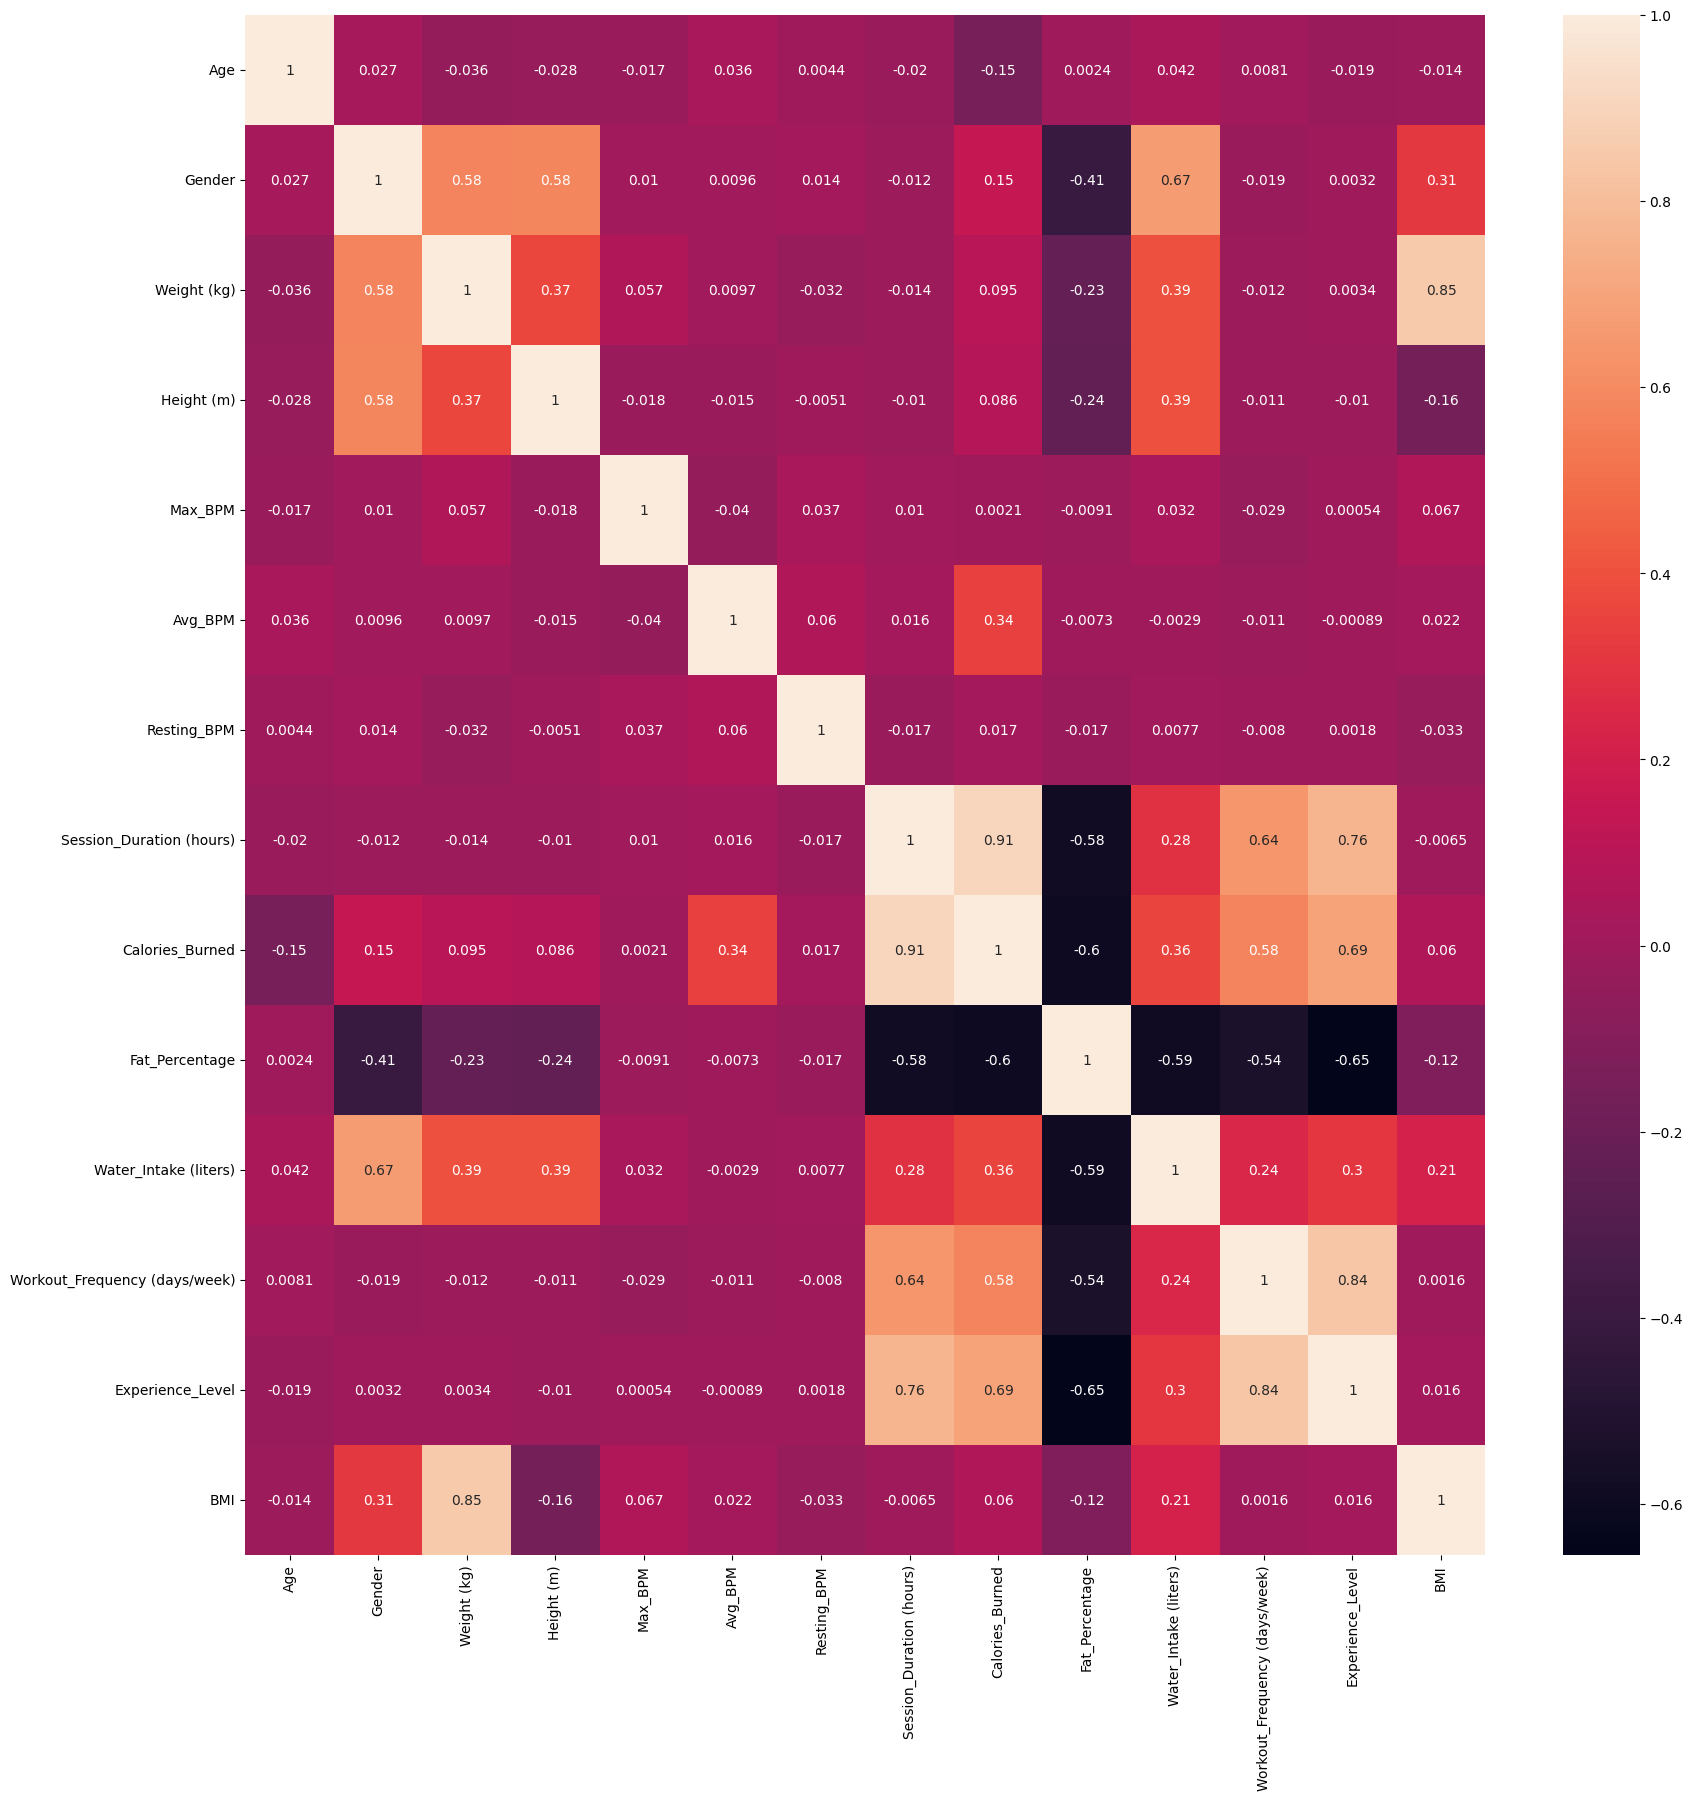

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.drop(columns=['Cardio', 'HIIT', 'Strength']).corr(), annot=True)
plt.show()

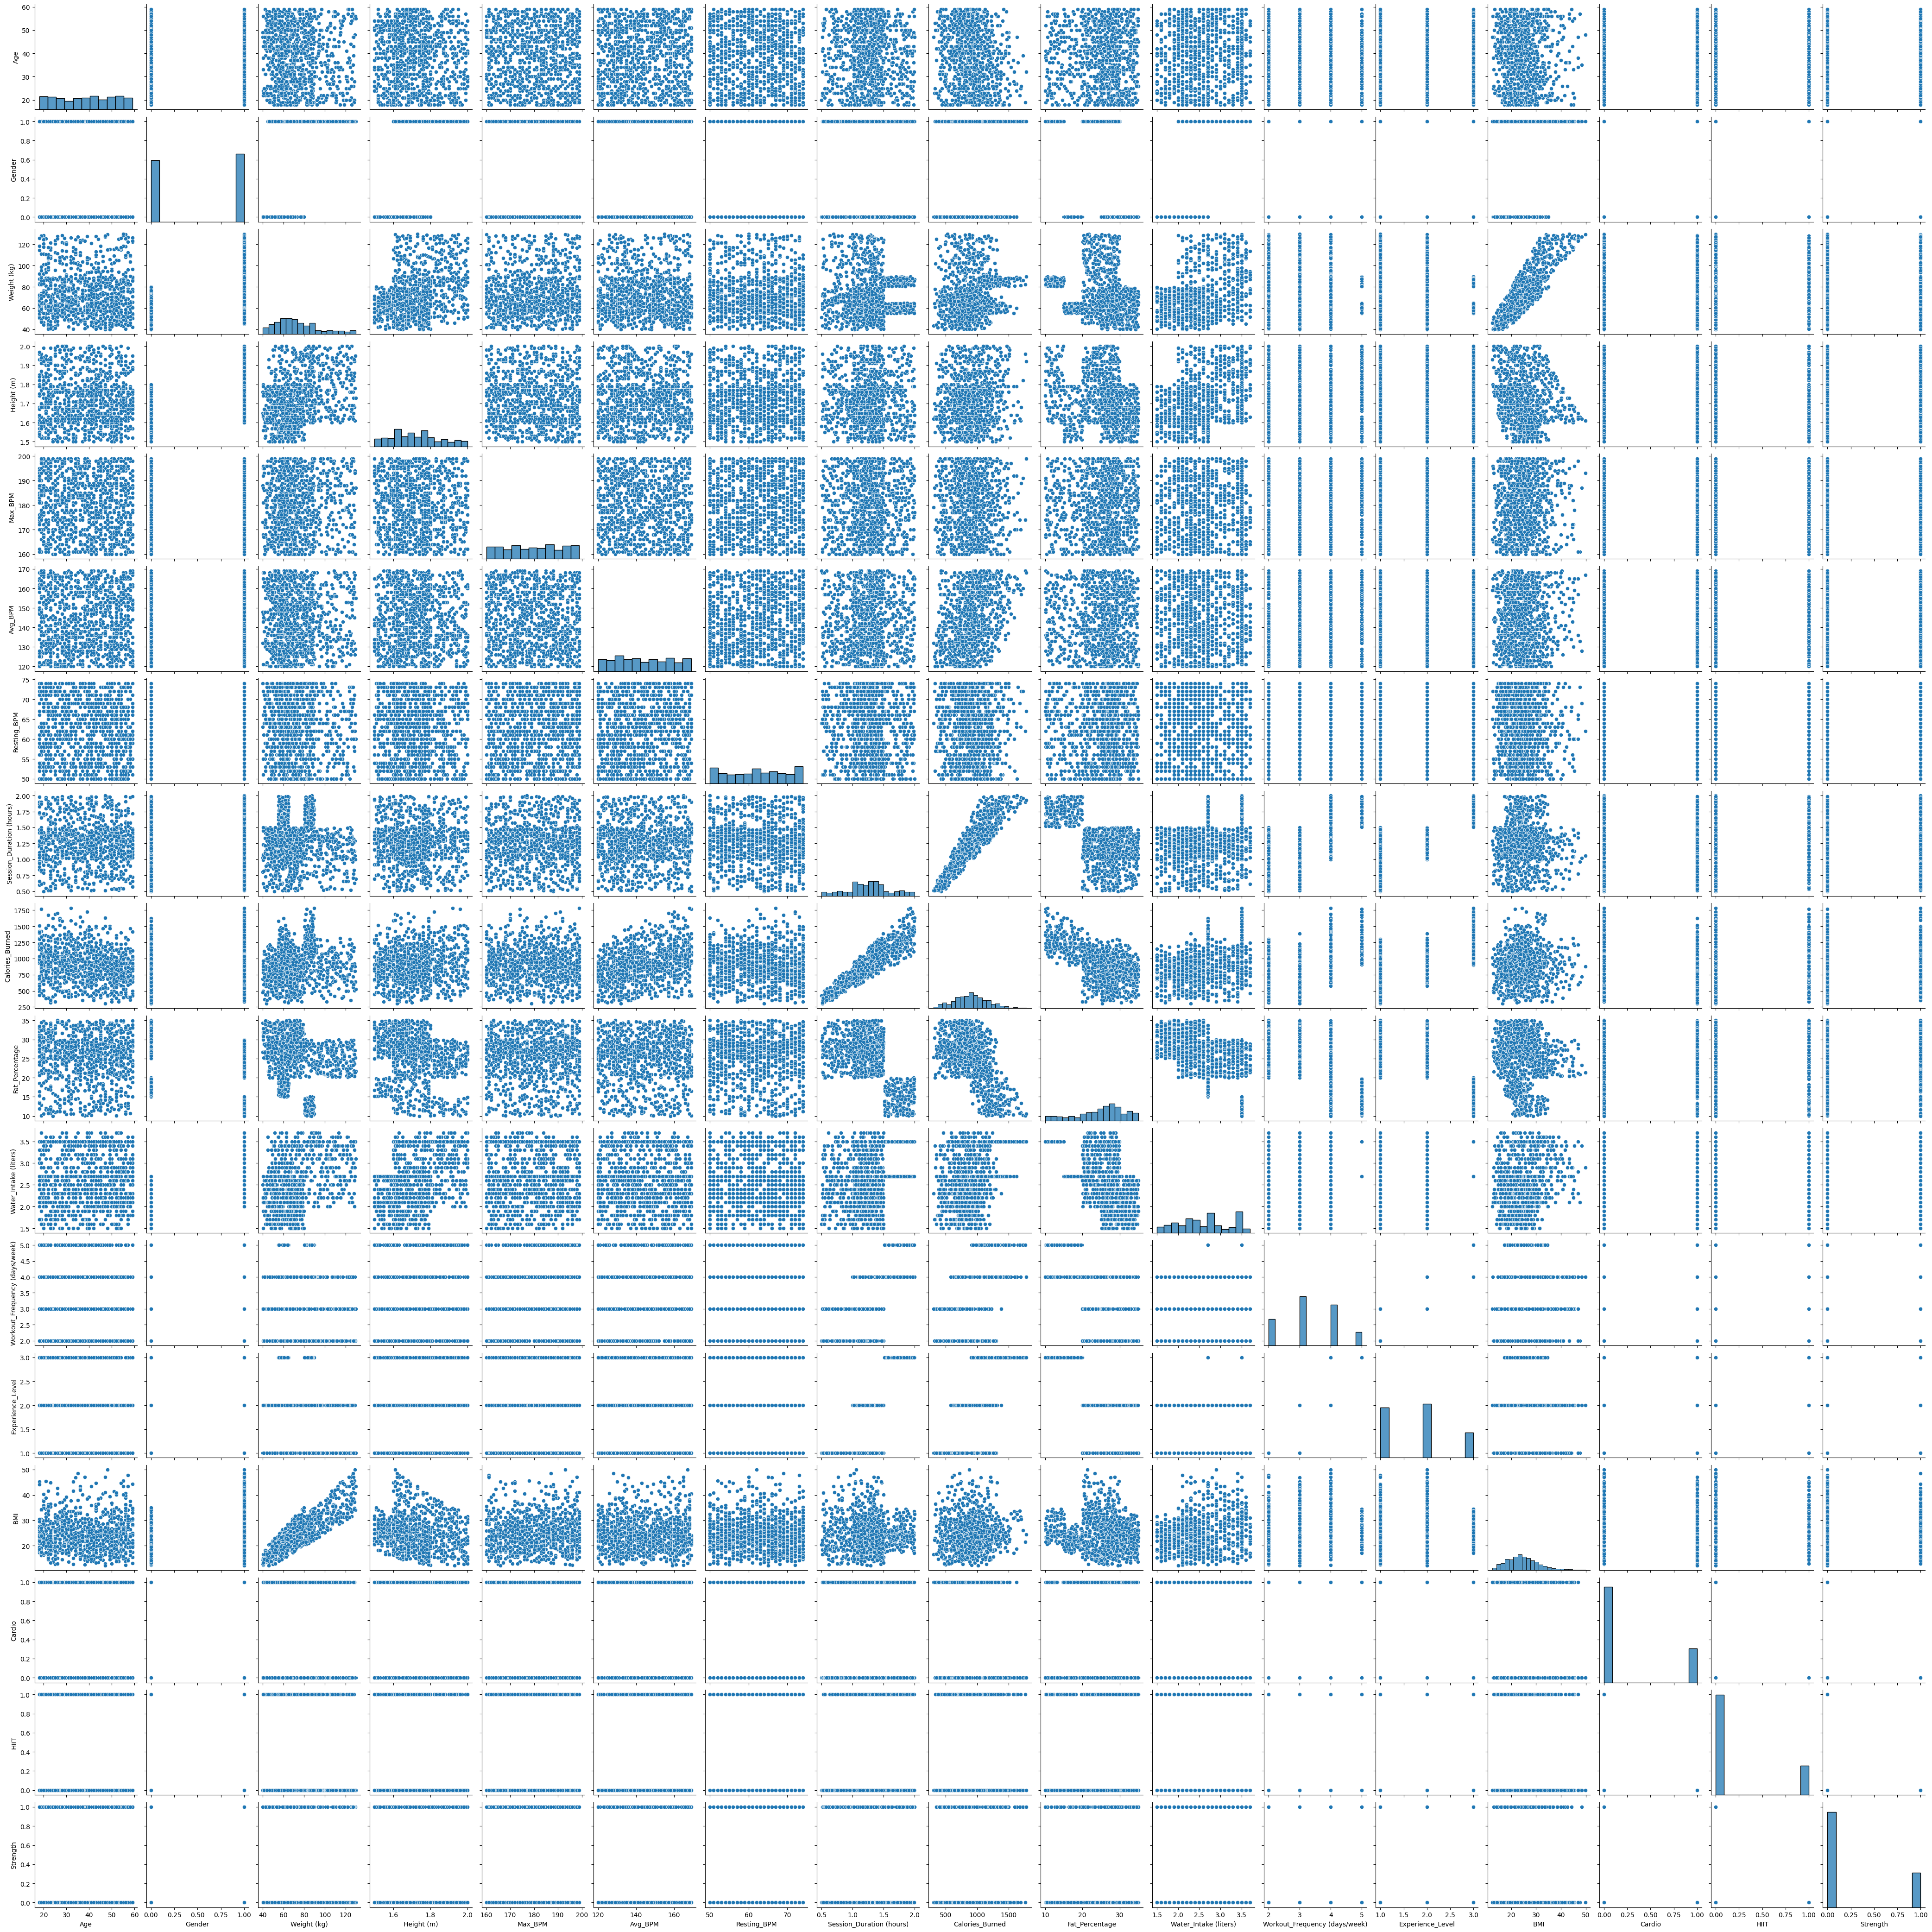

In [12]:
sns.pairplot(df)

Check if the dataset is balanced.

In [13]:
# Cannot check if DataFrame is balanced because the target variable is a real number (regression problem)

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [14]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
Cardio                           0
HIIT                             0
Strength                         0
dtype: int64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

In [15]:
# no missing values

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [16]:
# no missing values

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [17]:
X, y = df.drop(columns='Calories_Burned'), df['Calories_Burned']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling
Standardize the features appropriately.

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [21]:
# poly = PolynomialFeatures(degree=2)
# X_train = poly.fit_transform(X_train)
# X_test = poly.transform(X_test)

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)

LinearRegression()

Use the trained model to make predictions for the test set.

In [24]:
y_pred = model.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [25]:
mean_absolute_error(y_test, y_pred)

28.109884980675094

In [26]:
mean_squared_error(y_test, y_pred)

1413.6157045239947

In [27]:
r2_score(y_test, y_pred)

0.980505298558852